In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
faces = fetch_olivetti_faces()
X = faces.data
y = faces.target
images = faces.images
print(X.shape,y.shape)

(400, 4096) (400,)


In [3]:
X_train, X_temp, y_train, y_temp = train_test_split(

    X,y,
    test_size = 0.4,
    random_state = 42,
    stratify = y
)

In [4]:
X_val,X_test, y_val, y_test = train_test_split(

    X_temp, y_temp,
    random_state = 42,
    test_size = 0.5,
    stratify = y_temp,
    
)

In [5]:
k_values = range(2,20)
sil_scores = []


for k in k_values:
    kmeans  = KMeans(n_clusters=k,random_state=42)
    labels = kmeans.fit_predict(X_train)
    sil = silhouette_score(X_train,labels)
    sil_scores.append(sil)

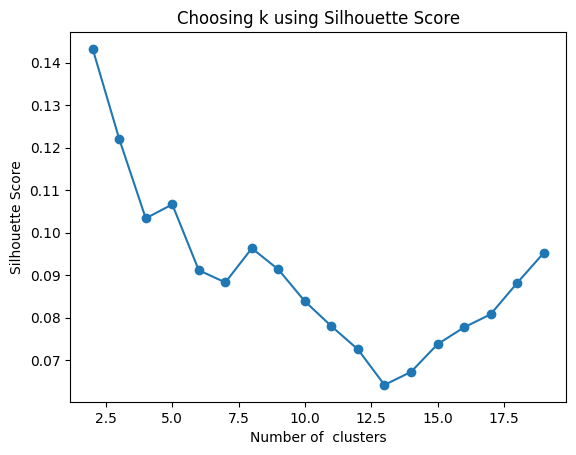

In [6]:
plt.plot(k_values, sil_scores, marker= 'o')
plt.xlabel("Number of  clusters")
plt.ylabel("Silhouette Score")
plt.title("Choosing k using Silhouette Score")
plt.show()

In [7]:
best_k = k_values[np.argmax(sil_scores)]
print(best_k)

2


In [8]:
kmeans  = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(X_train)

In [20]:
def plot_faces(faces, n_rows=2, n_cols=5):
    plt.figure(figsize=(2*n_cols, 2*n_rows))

    total = min(len(faces), n_rows * n_cols)

    for i in range(total):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(faces[i], cmap="gray")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


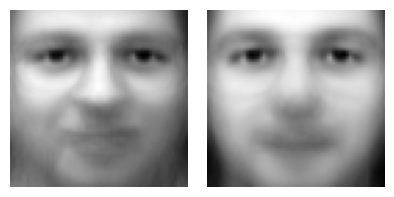

In [21]:
centroids = kmeans.cluster_centers_

centroid_images = centroids.reshape(-1, 64, 64)

plot_faces(centroid_images[:10])


Cluster 0


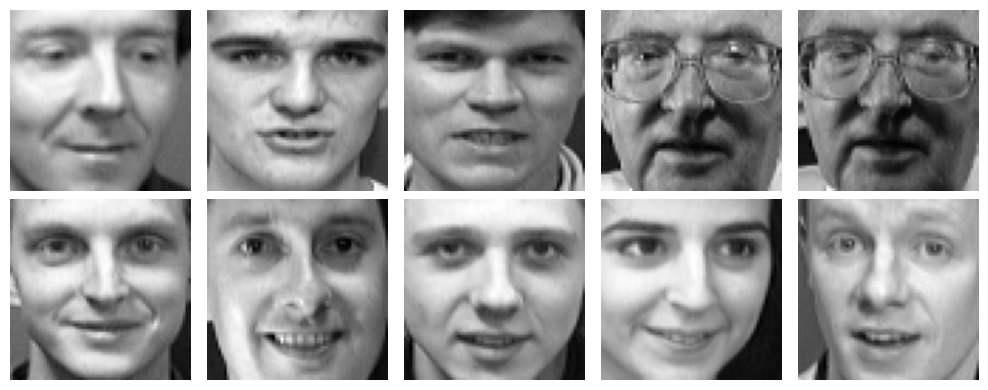

Cluster 1


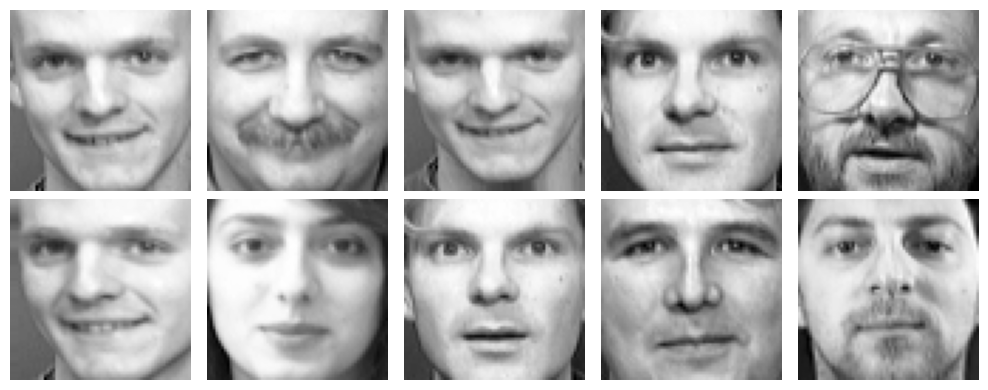

In [22]:
for cluster_id in range(min(best_k, 5)):
    cluster_faces = X_train[clusters == cluster_id]
    if len(cluster_faces) > 0:
        print(f"Cluster {cluster_id}")
        plot_faces(cluster_faces.reshape(-1, 64, 64)[:10])


In [23]:
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(y_train, clusters)
print("Adjusted Rand Index:", ari)


Adjusted Rand Index: 0.020925000789750393
